# Project: TMDB Movies Data Analysis
> I am investigating dataset: tmdb-movies.csv

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. (Source: https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True)
>
> I want to explore properties and relations for these features of movies: popularity, budget, revenue, runtime and genres of the movies. I will use the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. This will make comparisons of revenue and budget of movies in different years meaningful.
>
> I want to answer the following questions about this dataset:
> 1. Which genres are most popular on average from year to year?
> 2. What kinds of properties are associated with movies that have high popularity?
> 3. Which genres generate most revenue on average from year to year?
> 4. What kinds of properties are associated with movies that have high revenue?
> 5. Which genres have highest profit on average from year to year? I define profit as: revenue - budget
> 6. What kinds of properties are associated with movies that have high profit? I define profit as: revenue - budget

In [10]:
# Using this cell to set up import statements for all of the packages that I plan to use.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [11]:
# Loading data and printing shape 
df = pd.read_csv('tmdb-movies.csv')
print(df.shape)

(10866, 21)


In [12]:
# view data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
# Performing operations to inspect data types and looking for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The data types for columns look practical and consistent

### Drop Extraneous Columns

In [14]:
# dropping columns from dataset that are not part of investigation. For me, the relevant columns are: id, popularity, budget, revenue, original_title, runtime, genres, release_year, budget_adj, revenue_adj
df.drop(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'vote_count', 'vote_average', 'production_companies', 'release_date'], axis=1, inplace=True)

# confirming changes
df.head(1)

,id,popularity,budget,revenue,original_title,runtime,genres,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09


### Drop Rows with Missing Values

In [15]:
# view missing value count for each feature
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [16]:
# dropping rows with any null values in dataset
df.dropna(inplace=True)

In [17]:
# checking if any of columns have null values - should print False
df.isnull().sum().any()

False

### Dedupe Data

In [18]:
# printing number of duplicates in dataset
print(df.duplicated().sum())

1


In [19]:
# dropping duplicates in dataset
df.drop_duplicates(inplace=True)

In [20]:
# printing number of duplicates again to confirm dedupe - should be 0
print(df.duplicated().sum())

0


<a id='eda'></a>
## Exploratory Data Analysis

> The trimming and cleaning the data has been done. Now, I will explore and address the research questions that I posed in the Introduction. 


### Helper Functions

#### Plot histogram and do skew analysis

In [21]:
def analyze_skew(df, analyze_var):

    # Source for skew measure: http://www.statisticshowto.com/probability-and-statistics/skewed-distribution/
    skew_val = df[analyze_var].mean() - df[analyze_var].median()
    if skew_val > 0:
        print("The {} of the movies has a right (positive) skew)".format(analyze_var))
    elif skew_val < 0:
        print("The {} of the movies has a left (negative) skew)".format(analyze_var))
    else:
        print("The {} of the movies has no skew)".format(analyze_var))

    # Generate histogram for variable
    plt.hist(df[analyze_var])
    plt.title('Histogram ' + analyze_var)
    plt.xlabel(analyze_var)
    plt.ylabel('Frequency of {}'.format(analyze_var))

#### Generate genres that have maximum value of 'analyze_var' on average across movies from year to year

In [22]:
def generate_genre_per_year_analysis(df, analyze_var):
    
    # Split Genre Column and add multiple rows -> 1 movie can be associated with multiple genres so I want to
    # attribute the movie to each genre by splitting the 'genres' column and making it into multiple rows where
    # each row has 1 genre type and the attributes of the movie are repeated in each such row
    # Source: https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows/21032532
    df_split = df.copy()
    split_column = df_split['genres'].str.split('|').apply(pd.Series, 1).stack()
    split_column.index = split_column.index.droplevel(-1)
    split_column.name = 'genres'
    
    # Delete the original 'genres' column and replace it with new split_column
    del df_split['genres']
    df_split = df_split.join(split_column)
    
    # Now that the df_split contains each row with a single genre that has been attributed values from the associated movie,
    # I can group by year and they for each year, I can get mean of group by genres to get maximum mean genre per year
    # Source: https://pandas.pydata.org/pandas-docs/stable/groupby.html
    grouped = df_split.groupby('release_year')
    for name, group in grouped:        
        df_group = group.groupby('genres').mean()
        print("{} is the genre with most {} on average for year {} with value: {}". format(df_group[analyze_var].idxmax(), analyze_var, name, df_group[analyze_var].max()))

#### Analyze relation between two vars: independent_var, analyze_var using different methods

In [23]:
def analyze_2dvars_relation(df, independent_var, analyze_var):

    # PART I: Bar Chart of high values and low values
    # Use query to select each group and get its mean revenue_adj
    median_df = df[independent_var].median()
    low = df.query(independent_var + ' < {}'.format(median_df))
    high = df.query(independent_var + ' >= {}'.format(median_df))
    mean_low = low[analyze_var].mean()
    mean_high = high[analyze_var].mean()
    # Create a bar chart with proper labels
    locations = [1, 2]
    heights = [mean_low, mean_high]
    labels = ['Low', 'High']
    print('Do higher {} movies generate higher {}?'.format(independent_var, analyze_var))
    plt.figure(0)
    plt.bar(locations, heights, tick_label=labels)
    plt.title('Average {} by {}'.format(analyze_var, independent_var))
    plt.xlabel(independent_var)
    plt.ylabel(analyze_var)
    
    # PART II: Scatter Plot
    plt.figure(1)
    plt.scatter(df[independent_var], df[analyze_var])
    plt.title('Scatter Plot of {} vs {}'.format(independent_var, analyze_var))
    plt.xlabel(independent_var)
    plt.ylabel(analyze_var)    
    
    plt.show()
    
    # PART III: Measure Correlation 
    # Source: (https://stackoverflow.com/questions/42579908/use-corr-to-get-the-correlation-between-two-columns)    
    corr_vars = df[analyze_var].corr(df[independent_var])
    print('Correlation between {} and {} is: {}'.format(independent_var, analyze_var, corr_vars))

### Exploring some individual variables
> I will explore these individual variables: popularity, revenue_adj, budget_adj, runtime. 
> I want to study them individually and then answer questions using these variables.

The popularity of the movies has a right (positive) skew)


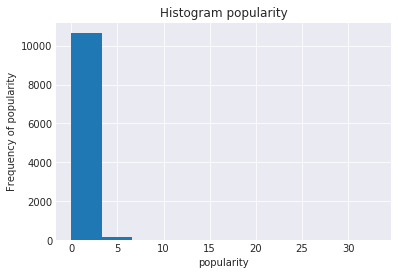

In [24]:
analyze_skew(df, 'popularity')

In [25]:
sum(df['popularity'] == 0)

0

The revenue_adj of the movies has a right (positive) skew)


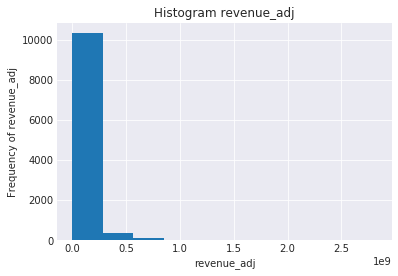

In [26]:
analyze_skew(df, 'revenue_adj')

In [27]:
sum(df['revenue_adj'] == 0)

5993

The budget_adj of the movies has a right (positive) skew)


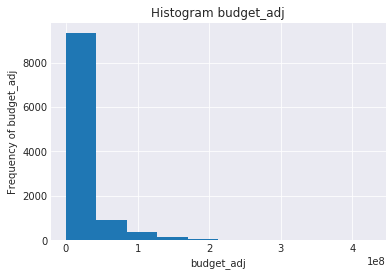

In [28]:
analyze_skew(df, 'budget_adj')

In [29]:
sum(df['budget_adj'] == 0)

5674

The runtime of the movies has a right (positive) skew)


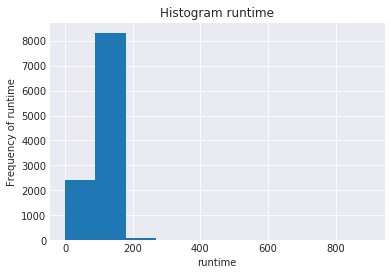

In [30]:
analyze_skew(df, 'runtime')

In [31]:
sum(df['runtime'] == 0)

30

Variables: revenue_adj, budget_adj and runtime have some values equal to 0. The value of 0 does not make sense for these variables. These are incorrect values. Hence, when doing analysis using these variables, care needs to be taken to remove these '0' values before doing analysis. I will regenerate histogram and skew for these variables removing the '0' values.

The revenue_adj of the movies has a right (positive) skew)


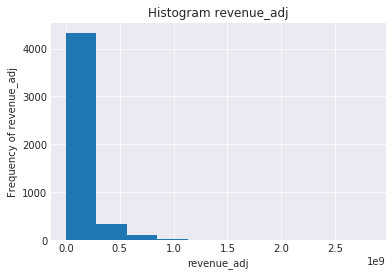

In [32]:
df_temp = df.query('revenue_adj != 0')
analyze_skew(df_temp, 'revenue_adj')

The budget_adj of the movies has a right (positive) skew)


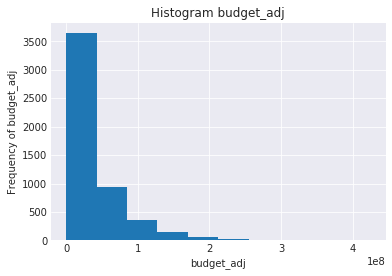

In [33]:
df_temp = df.query('budget_adj != 0')
analyze_skew(df_temp, 'budget_adj')

The runtime of the movies has a right (positive) skew)


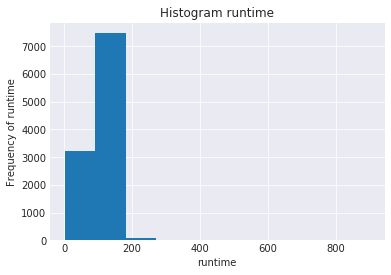

In [34]:
df_temp = df.query('runtime != 0')
analyze_skew(df_temp, 'runtime')

### Investigating the Questions

### 1. Which genres are most popular on average from year to year?

In [35]:
generate_genre_per_year_analysis(df, 'popularity')

Thriller is the genre with most popularity on average for year 1960 with value: 0.8119099999999997
Animation is the genre with most popularity on average for year 1961 with value: 2.631987
Adventure is the genre with most popularity on average for year 1962 with value: 0.9425134285714287
Animation is the genre with most popularity on average for year 1963 with value: 2.1804099999999997
War is the genre with most popularity on average for year 1964 with value: 0.930959
Music is the genre with most popularity on average for year 1965 with value: 0.96885
Animation is the genre with most popularity on average for year 1966 with value: 0.5857173333333333
Animation is the genre with most popularity on average for year 1967 with value: 1.3488049999999996
Mystery is the genre with most popularity on average for year 1968 with value: 1.5194557499999997
Crime is the genre with most popularity on average for year 1969 with value: 0.94802
Animation is the genre with most popularity on average for 

### 2. What kinds of properties are associated with movies that have high popularity?

Do higher budget_adj movies generate higher popularity?


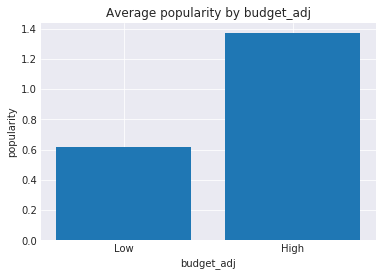

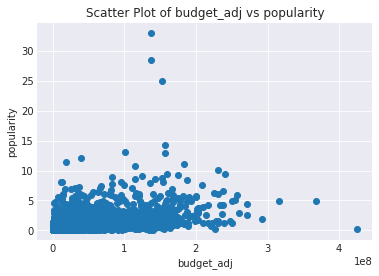

Correlation between budget_adj and popularity is: 0.4352959785540187


In [36]:
df_temp = df.query('budget_adj != 0 and popularity != 0')
analyze_2dvars_relation(df_temp, 'budget_adj', 'popularity')

Do higher revenue_adj movies generate higher popularity?


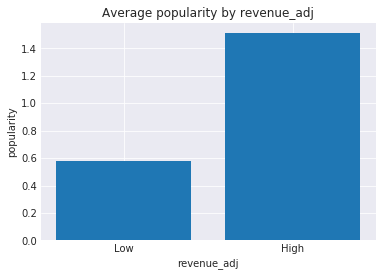

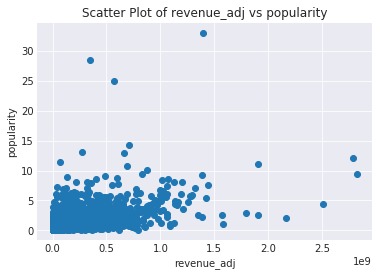

Correlation between revenue_adj and popularity is: 0.5617457860743332


In [37]:
df_temp = df.query('revenue_adj != 0 and popularity != 0')
analyze_2dvars_relation(df_temp, 'revenue_adj', 'popularity')

Do higher runtime movies generate higher popularity?


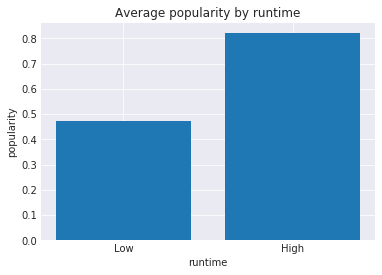

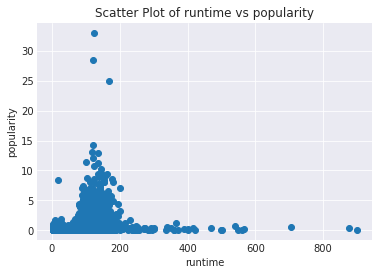

Correlation between runtime and popularity is: 0.13638386411563316


In [38]:
df_temp = df.query('runtime != 0 and popularity != 0')
analyze_2dvars_relation(df_temp, 'runtime', 'popularity')

### 3. Which genres generate most revenue on average from year to year?

In [39]:
df_temp = df.query('revenue_adj != 0')
generate_genre_per_year_analysis(df_temp, 'revenue_adj')

History is the genre with most revenue_adj on average for year 1960 with value: 442378047.431774
Animation is the genre with most revenue_adj on average for year 1961 with value: 1574814739.70476
History is the genre with most revenue_adj on average for year 1962 with value: 504591421.51332694
Action is the genre with most revenue_adj on average for year 1963 with value: 316487576.35502315
Action is the genre with most revenue_adj on average for year 1964 with value: 878080399.544157
Family is the genre with most revenue_adj on average for year 1965 with value: 1129534861.9935699
Drama is the genre with most revenue_adj on average for year 1966 with value: 180501933.108727
Animation is the genre with most revenue_adj on average for year 1967 with value: 1345551058.9884
Mystery is the genre with most revenue_adj on average for year 1968 with value: 258085339.40168968
Crime is the genre with most revenue_adj on average for year 1969 with value: 608151066.341555
Thriller is the genre with

### 4. What kinds of properties are associated with movies that have high revenue_adj?

Do higher budget_adj movies generate higher revenue_adj?


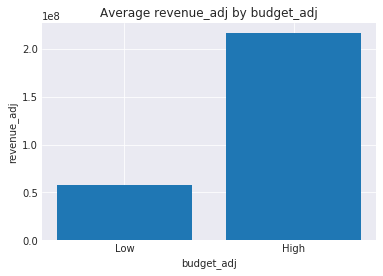

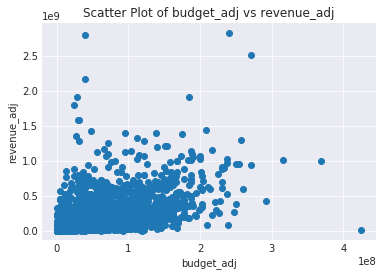

Correlation between budget_adj and revenue_adj is: 0.5704510195812404


In [40]:
df_temp = df.query('budget_adj != 0 and revenue_adj != 0')
analyze_2dvars_relation(df_temp, 'budget_adj', 'revenue_adj')

Do higher popularity movies generate higher revenue_adj?


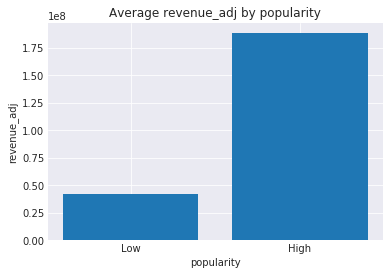

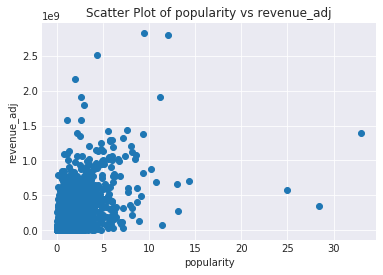

Correlation between popularity and revenue_adj is: 0.5617457860743332


In [41]:
df_temp = df.query('popularity != 0 and revenue_adj != 0')
analyze_2dvars_relation(df_temp, 'popularity', 'revenue_adj')

Do higher runtime movies generate higher revenue_adj?


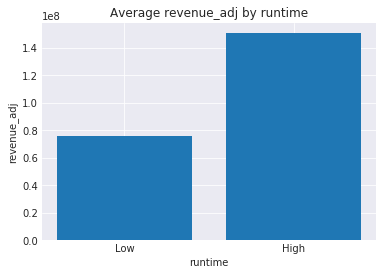

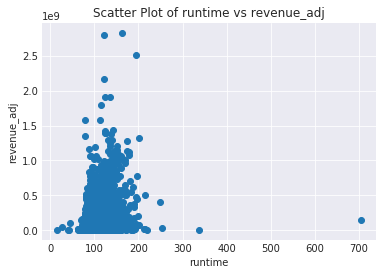

Correlation between runtime and revenue_adj is: 0.2639136719498438


In [42]:
df_temp = df.query('runtime != 0 and revenue_adj != 0')
analyze_2dvars_relation(df_temp, 'runtime', 'revenue_adj')

### Calculate Profit

In [43]:
df['profit'] = df['revenue'] - df['budget']

### 5. Which genres have highest profit on average from year to year? I define profit as: revenue - budget

In [44]:
df_temp = df.query('profit != 0')
generate_genre_per_year_analysis(df_temp, 'profit')

History is the genre with most profit on average for year 1960 with value: 48000000.0
Animation is the genre with most profit on average for year 1961 with value: 211880014.0
Adventure is the genre with most profit on average for year 1962 with value: 49500000.0
Thriller is the genre with most profit on average for year 1963 with value: 21530838.25
Action is the genre with most profit on average for year 1964 with value: 121400000.0
Family is the genre with most profit on average for year 1965 with value: 155014286.0
War is the genre with most profit on average for year 1966 with value: 8000000.0
Animation is the genre with most profit on average for year 1967 with value: 100921706.0
Mystery is the genre with most profit on average for year 1968 with value: 34168741.0
History is the genre with most profit on average for year 1969 with value: 42154444.5
Thriller is the genre with most profit on average for year 1970 with value: 90489151.0
Action is the genre with most profit on average 

### 6. What kinds of properties are associated with movies that have high profit? I define profit as: revenue - budget

Do higher budget_adj movies generate higher profit?


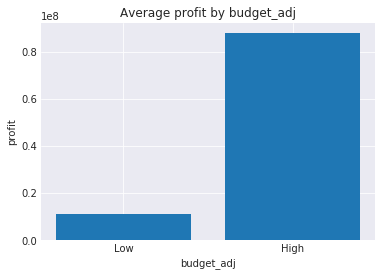

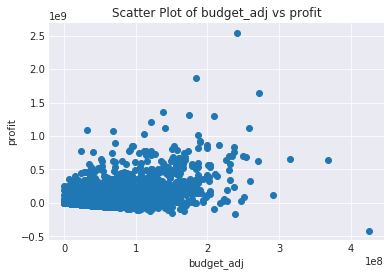

Correlation between budget_adj and profit is: 0.5118306831430509


In [45]:
df_temp = df.query('budget_adj != 0 and profit != 0')
analyze_2dvars_relation(df_temp, 'budget_adj', 'profit')

Do higher popularity movies generate higher profit?


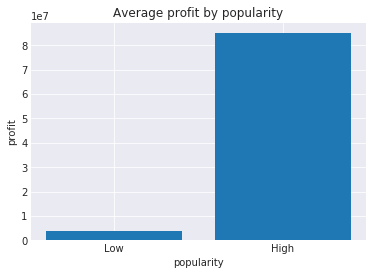

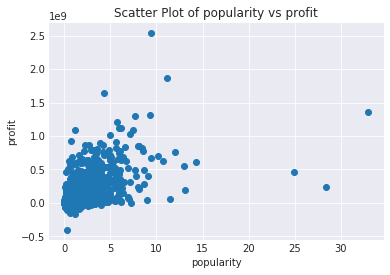

Correlation between popularity and profit is: 0.6159066239679605


In [46]:
df_temp = df.query('popularity != 0 and profit != 0')
analyze_2dvars_relation(df_temp, 'popularity', 'profit')

Do higher revenue_adj movies generate higher profit?


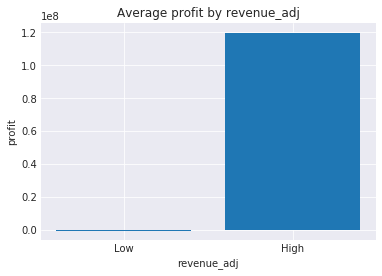

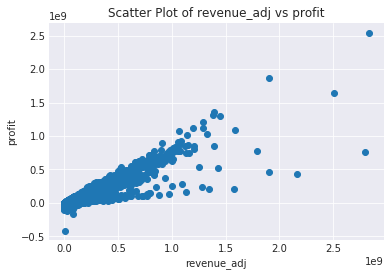

Correlation between revenue_adj and profit is: 0.9073742632330077


In [47]:
df_temp = df.query('revenue_adj != 0 and profit != 0')
analyze_2dvars_relation(df_temp, 'revenue_adj', 'profit')

Do higher runtime movies generate higher profit?


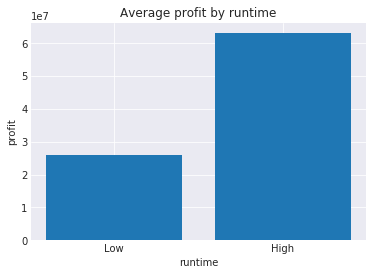

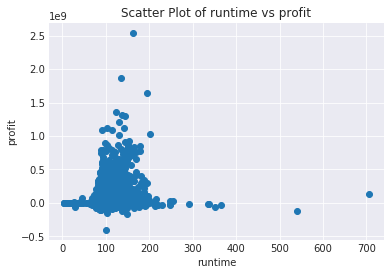

Correlation between runtime and profit is: 0.1842565088527878


In [48]:
df_temp = df.query('runtime != 0 and profit != 0')
analyze_2dvars_relation(df_temp, 'runtime', 'profit')

<a id='conclusions'></a>
## Conclusions

> My goal was to answer the following questions about this dataset:
> 1. Which genres are most popular on average from year to year? 
<br>
> I answered this question and displayed genre for each year. For example, Adventure is the genre with most popularity on average for year 2015 with value: 3.283786391304348.
<br>
<br>
> 2. What kinds of properties are associated with movies that have high popularity? 
<br>
> Movies with high revenue and high budget generally have high popularity. Correlation between revenue_adj and popularity is: 0.561. Correlation between budget_adj and popularity is: 0.435.
<br>
<br>
> 3. Which genres generate most revenue on average from year to year?
<br>
> I answered this question and displayed genre for each year. For example, Adventure is the genre with most revenue_adj on average for year 2015 with value: 321,449,344 dollars.
<br>
<br>
> 4. What kinds of properties are associated with movies that have high revenue? 
<br>
> Movies with high popularity and high budget generally have high revenue. Correlation between popularity and revenue_adj is: 0.561. Correlation between budget_adj and revenue_adj is: 0.570.
<br>
<br>
> 5. Which genres have highest profit on average from year to year? I define profit as: revenue - budget.
<br>
> I answered this question and displayed genre for each year. For example, Adventure is the genre with most profit on average for year 2015 with value: 217,181,803 dollars.
<br>
<br>
> 6. What kinds of properties are associated with movies that have high profit? I define profit as: revenue - budget.
<br>
> Movies with high revenue and high popularity generally have high profit. Correlation between revenue_adj and profit is: 0.907. Correlation between popularity and profit is: 0.616. 


> Limitations of my analysis:
> 1. The analysis has explored relationships between variables using correlation. This analysis does not explore causation between variables.
> 2. Analysis was done using values such that rows were dropped for null and '0' values. There is a possibility that these values could have been filled with mean values or with interpolated values.





In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0